### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Loading Data

In [2]:
data = pd.read_csv('global_heat_index.csv')

In [3]:
data.head()

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
0,2011,1,1,0,8,13.522659,986.761841,72.295858,37.288387,3.011042,0
1,2011,1,1,1,8,12.835814,986.441406,75.376186,37.686718,3.091243,0
2,2011,1,1,2,8,12.198058,985.736511,78.405198,35.053905,3.007649,0
3,2011,1,1,3,8,11.583500,985.525696,81.042980,30.135216,2.926715,0
4,2011,1,1,4,8,11.029578,985.661926,82.548508,24.402969,2.915177,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   17520 non-null  int64  
 1   Month                  17520 non-null  int64  
 2   Day                    17520 non-null  int64  
 3   Hour                   17520 non-null  int64  
 4   Dew Point              17520 non-null  int64  
 5   Temperature            17520 non-null  float64
 6   Pressure               17520 non-null  float64
 7   Relative Humidity      17520 non-null  float64
 8   Wind Direction         17520 non-null  float64
 9   Wind Speed             17520 non-null  float64
 10  Solar Radiation (GHI)  17520 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 1.5 MB


In [5]:
data.describe()

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
count,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000
mean,2011.500000,6.526027,15.720548,11.500000,11.375171,26.953731,979.699263,47.635089,182.306160,2.637895,235.047945
std,0.500014,3.447950,8.796498,6.922384,10.850196,8.417945,6.130488,26.734818,98.695757,1.244842,312.916933
min,2011.000000,1.000000,1.000000,0.000000,-28.000000,5.063506,964.755859,0.921771,0.034660,0.030113,0.000000
25%,2011.000000,4.000000,8.000000,5.750000,3.000000,21.611058,974.325027,23.413340,84.141256,1.718903,0.000000
50%,2011.500000,7.000000,16.000000,11.500000,12.000000,27.455196,980.491516,46.529440,221.495407,2.564217,0.000000
75%,2012.000000,10.000000,23.000000,17.250000,22.000000,32.031030,984.943756,69.450031,250.299492,3.412514,489.250000
max,2012.000000,12.000000,31.000000,23.000000,27.000000,52.157927,993.353210,100.000000,359.989960,7.287084,1001.000000


### Cleaning Data

In [6]:
# Cleaning up the data
clean1 = data[data['Hour']<8]
clean2 = data[data['Hour']>17]
print('Cleaning data from 12:00 am to 7:59 am')
clean1.head(10)

Cleaning data from 12:00 am to 7:59 am


,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
0,2011,1,1,0,8,13.522659,986.761841,72.295858,37.288387,3.011042,0
1,2011,1,1,1,8,12.835814,986.441406,75.376186,37.686718,3.091243,0
2,2011,1,1,2,8,12.198058,985.736511,78.405198,35.053905,3.007649,0
3,2011,1,1,3,8,11.583500,985.525696,81.042980,30.135216,2.926715,0
4,2011,1,1,4,8,11.029578,985.661926,82.548508,24.402969,2.915177,0
5,2011,1,1,5,1,8.098655,985.723206,65.278494,89.290062,1.937899,0
6,2011,1,1,6,2,7.806705,986.249146,67.093181,95.835983,1.815175,0
7,2011,1,1,7,2,9.036408,987.038940,64.035483,105.198181,1.615310,0
24,2011,1,2,0,3,10.231350,984.838196,61.345492,79.954536,2.360912,0
25,2011,1,2,1,3,9.653407,984.457092,63.566375,87.481873,2.193934,0


In [7]:
print('Cleaning data from 18:00 pm to 12:00 am')
clean2.head(10)

Cleaning data from 18:00 pm to 12:00 am


,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
18,2011,1,1,18,4,14.728780,986.536682,50.818219,30.906128,2.666706,0
19,2011,1,1,19,4,13.915211,987.175781,52.122064,38.189991,2.709682,0
20,2011,1,1,20,3,13.106395,987.245666,53.782549,45.614468,2.713746,0
21,2011,1,1,21,3,12.326217,986.971375,55.613451,53.939449,2.701125,0
22,2011,1,1,22,3,11.570982,986.042419,57.458358,62.491528,2.639709,0
23,2011,1,1,23,3,10.869849,985.439819,59.446614,71.250389,2.511646,0
42,2011,1,2,18,5,14.914580,986.784424,53.755117,55.795021,2.222224,0
43,2011,1,2,19,5,14.152280,987.563416,54.899280,64.419899,2.399542,0
44,2011,1,2,20,4,13.421063,987.949341,55.893813,73.117203,2.673051,0
45,2011,1,2,21,4,12.687589,987.704529,57.250441,81.467941,2.940782,0


In [8]:
data = data.drop(clean1.index,axis=0)
data = data.drop(clean2.index,axis=0)

In [9]:
print("Cleaned Data Description")
data.describe()

Cleaned Data Description


,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
count,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000
mean,2011.500000,6.526027,15.720548,12.500000,10.981096,31.574868,979.747719,37.275585,196.574439,2.336529,549.648356
std,0.500034,3.448088,8.796850,2.872478,11.361847,7.547733,6.236236,24.016038,99.430842,1.252229,251.884703
min,2011.000000,1.000000,1.000000,8.000000,-28.000000,9.500333,964.755859,0.921771,0.034660,0.030113,0.000000
25%,2011.000000,4.000000,8.000000,10.000000,2.000000,26.819195,974.293610,16.372131,101.827642,1.408638,360.000000
50%,2011.500000,7.000000,16.000000,12.500000,11.000000,31.200264,980.519379,34.036103,233.463554,2.148003,581.000000
75%,2012.000000,10.000000,23.000000,15.000000,22.000000,36.676756,984.940826,55.186414,262.241684,3.090691,755.000000
max,2012.000000,12.000000,31.000000,17.000000,27.000000,52.157927,993.353210,95.018216,359.821167,7.026951,1001.000000


In [10]:
print("Cleaned Data")
data.head()

Cleaned Data


,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
8,2011,1,1,8,3,12.158280,987.897400,55.105656,113.317665,1.439088,159
9,2011,1,1,9,3,14.965301,988.211914,47.166938,117.327606,1.063374,363
10,2011,1,1,10,3,18.956082,988.054504,36.747087,72.488327,0.545695,533
11,2011,1,1,11,2,21.354047,987.463867,29.157015,12.976929,0.980117,649
12,2011,1,1,12,2,22.161257,986.386169,27.593071,4.777779,1.411915,698


### Preparing Training and Testing Data

In [11]:
x = data.iloc[:,4:10].values
y = data.iloc[:,10].values

y = y.reshape(-1,1)

from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [12]:
print(x_train)

[[2.40000000e+01 3.40759508e+01 9.74828308e+02 5.79439253e+01
  2.35556580e+02 3.56115151e+00]
 [5.00000000e+00 4.39687253e+01 9.78394714e+02 9.62026566e+00
  2.96710388e+02 2.14120865e-01]
 [2.00000000e+00 2.01886504e+01 9.86712707e+02 3.05860928e+01
  1.12360039e+02 1.53431237e+00]
 ...
 [2.20000000e+01 3.74988761e+01 9.72753601e+02 4.12720565e+01
  2.28498413e+02 5.28038406e+00]
 [2.40000000e+01 2.91134132e+01 9.75037415e+02 7.73187352e+01
  2.59217102e+02 3.79111195e+00]
 [2.30000000e+01 2.97309726e+01 9.82421387e+02 6.89828187e+01
  2.43729141e+02 2.79658031e+00]]


In [13]:
print(y_train)

[[604]
 [812]
 [367]
 ...
 [880]
 [533]
 [741]]


### Standardizing Data

In [14]:
from sklearn.preprocessing import StandardScaler
sc_x    = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test  = sc_x.transform(x_test)
sc_y    = StandardScaler()
y_train = sc_y.fit_transform(y_train)

In [15]:
print(x_train)

[[ 1.14488839  0.3262235  -0.78454301  0.86473914  0.38847465  0.97818533]
 [-0.52836595  1.64181454 -0.21154329 -1.14994906  1.00536125 -1.70099715]
 [-0.792564   -1.52057973  1.12487418 -0.27585126 -0.85426553 -0.64422943]
 ...
 [ 0.96875636  0.78142137 -1.11787758  0.16966311  0.31727568  2.35437165]
 [ 1.14488839 -0.33371977 -0.75094673  1.67250496  0.62714922  1.16226073]
 [ 1.05682237 -0.2515936   0.43540546  1.32496769  0.47091504  0.36617249]]


In [16]:
print(y_train)

[[ 0.21389334]
 [ 1.03840629]
 [-0.72557574]
 ...
 [ 1.3079586 ]
 [-0.06755098]
 [ 0.75696197]]


### K Means with 6 clusters

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans = kmeans.fit(x_train)

/Users/ritikagupta/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [18]:
# View predict class
labels = kmeans.labels_
print("Labels :",labels)

# view cluster centers
cluster_centers = kmeans.cluster_centers_
print("\n\n Cluster Centroids : \n",cluster_centers)

Labels : [1 2 4 ... 3 1 1]


 Cluster Centroids : 
 [[ 0.32571084 -0.30052662  0.76094093  0.30992681 -1.14410991 -0.91161055]
 [ 1.18589921 -0.03073396 -0.9103993   1.36363294  0.23884304 -0.08227919]
 [-1.06019437  0.91830492 -0.01942235 -1.16522186  0.63403475 -0.00265423]
 [ 0.38670059  1.1007549  -1.07174468 -0.39032717  0.46344033  1.53039072]
 [-0.96247763 -1.17694881  1.18659865 -0.44901948 -1.32938505 -0.34042293]
 [-0.18960959 -0.62036966  0.69600044 -0.06718403  0.88477692 -0.54623938]]


### Applying PCA - Dimensionality Reduction
for visualizing 6 dimensional space we will be reducing dimensions

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(x_train).transform(x_train)

In [20]:
# Reduced 6 parameters to 2 parameters
pca

array([[-1.76973667,  0.60572549],
       [-0.07110704, -1.46624754],
       [ 2.21876651,  0.47919178],
       ...,
       [-2.36111386, -0.51887879],
       [-1.81290306,  1.30514795],
       [-0.70745185,  1.29022417]])

In [21]:
x_train

array([[ 1.14488839,  0.3262235 , -0.78454301,  0.86473914,  0.38847465,
         0.97818533],
       [-0.52836595,  1.64181454, -0.21154329, -1.14994906,  1.00536125,
        -1.70099715],
       [-0.792564  , -1.52057973,  1.12487418, -0.27585126, -0.85426553,
        -0.64422943],
       ...,
       [ 0.96875636,  0.78142137, -1.11787758,  0.16966311,  0.31727568,
         2.35437165],
       [ 1.14488839, -0.33371977, -0.75094673,  1.67250496,  0.62714922,
         1.16226073],
       [ 1.05682237, -0.2515936 ,  0.43540546,  1.32496769,  0.47091504,
         0.36617249]])

### Visualisation

In [23]:
pca.shape[0]

5840

In [24]:
len(labels)

5840

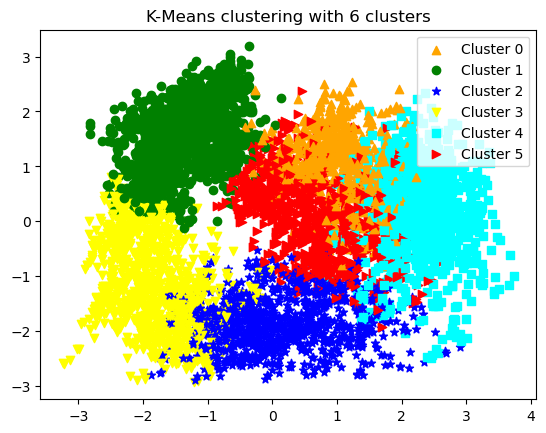

In [32]:
for i in range(0,pca.shape[0]):
    if kmeans.labels_[i] == 0:
        c1_6 = plt.scatter(pca[i,0],pca[i,1],c='orange',marker="^")
    elif kmeans.labels_[i] == 1:
        c2_6 = plt.scatter(pca[i,0],pca[i,1],c='g',marker="o")
    elif kmeans.labels_[i] == 2:
        c3_6 = plt.scatter(pca[i,0],pca[i,1],c='b',marker="*")
    elif kmeans.labels_[i] == 3:
        c4_6 = plt.scatter(pca[i,0],pca[i,1],c='yellow',marker="v")
    elif kmeans.labels_[i] == 4:
        c5_6 = plt.scatter(pca[i,0],pca[i,1],c='cyan',marker="s")
    elif kmeans.labels_[i] == 5:
        c6_6 = plt.scatter(pca[i,0],pca[i,1],c='red',marker=">")
plt.rcParams['figure.figsize'] = (12,10)
plt.legend([c1_6,c2_6,c3_6,c4_6,c5_6,c6_6],["Cluster 0", "Cluster 1",
                                            "Cluster 2", "Cluster 3",
                                            "Cluster 4", "Cluster 5"])
plt.title('K-Means clustering with 6 clusters')
plt.show()